In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

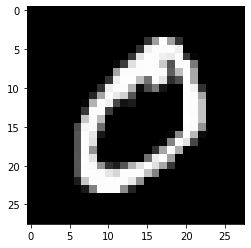

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[1], cmap="gray")

In [4]:
x_train[0].shape

(28, 28)

In [5]:
28*28

784

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')


decoder_input = keras.layers.Dense(784, activation='relu')(encoder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-27 15:17:45.348995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-27 15:17:45.349817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(opt, loss='mse')

In [11]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

2023-01-27 15:17:54.296583: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-27 15:17:54.442369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/3
1686/1688 [============================>.] - ETA: 0s - loss: 0.0173

2023-01-27 15:18:02.857198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 9s 4ms/step - loss: 0.0173 - val_loss: 0.0115
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0107 - val_loss: 0.0106


In [12]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

2023-01-27 15:18:29.522488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [13]:
print(example)

[0.46753556 1.0307913  1.4515179  0.5584208  0.5077632  1.6769203
 1.2303977  0.35286978 1.3575231  1.0432997  0.         1.7274331
 0.         0.9976162  1.423551   1.0310909  0.94898754 0.8852025
 1.0890691  3.406995   1.7824988  2.8670197  1.273879   1.1849581
 1.5993854  0.647017   1.5755512  1.6299337  0.87223846 1.1131191
 1.3718975  2.3070421  0.06366219 0.         0.93512595 0.9191007
 1.9308025  1.5418497  0.33237976 0.01490092 0.31299287 0.12831147
 0.44137624 1.3605698  2.0762846  0.8698951  0.90515625 2.2129314
 1.5287311  0.5089582  1.2951071  0.00357735 1.3513415  1.4866805
 0.3248099  0.1300909  0.         1.2569189  0.45938563 0.6540885
 0.6720415  0.         2.091424   1.3306165 ]


In [14]:
example.shape

(64,)

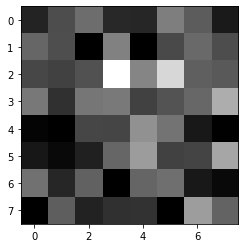

In [15]:
plt.imshow(example.reshape((8,8)), cmap='gray')

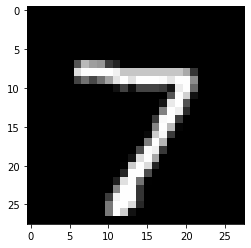

In [16]:
plt.imshow(x_test[0], cmap='gray')

In [17]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

2023-01-27 15:18:46.595276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


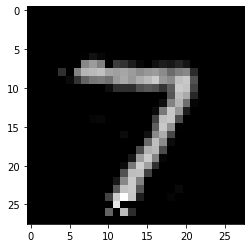

In [18]:
plt.imshow(ae_out, cmap='gray')